In [1]:
import numpy as np
import matplotlib.pyplot as plt

<br>

# Game forms
---

<br>

### Normal form

Represent the game as a matrix (for 2 players) where each pure-strategy (for one-stage game, the strategy is just a single action) appears on the side of the matrix and the payoff for each pair of player-strategy is shown in the cells, separated with a slash:

<div style="width:80%">
    <div style="width:33%;float:left;">
        <div style="text-align:center">Prisonner's dilema</div>
        <table style="text-align:center;width:150px;margin-left:auto;margin-right:auto">
          <tr>
            <th></th>
            <th>D</th>
            <th>S</th>
          </tr>
          <tr>
            <th>D</th>
            <td>-4/-4</td>
            <td>0/-5</td>
          </tr>
          <tr>
            <th>S</th>
            <td>-5/0</td>
            <td>-1/-1</td>
          </tr>
        </table>
    </div>
    <div style="width:33%;float:left;">
        <div style="text-align:center">Matching pennies</div>
        <table style="text-align:center;width:150px;margin-left:auto;margin-right:auto">
          <tr>
            <th></th>
            <th>A</th>
            <th>B</th>
          </tr>
          <tr>
            <th>A</th>
            <td>1/-1</td>
            <td>-1/1</td>
          </tr>
          <tr>
            <th>B</th>
            <td>-1/1</td>
            <td>1/-1</td>
          </tr>
        </table>
    </div>
    <div style="width:33%;float:right;">
        <div style="text-align:center">Battle of sexes</div>
        <table style="text-align:center;width:150px;margin-left:auto;margin-right:auto">
          <tr>
            <th></th>
            <th>O</th>
            <th>F</th>
          </tr>
          <tr>
            <th>O</th>
            <td>2/1</td>
            <td>0/0</td>
          </tr>
          <tr>
            <th>F</th>
            <td>0/0</td>
            <td>1/2</td>
          </tr>
        </table>
    </div>
</div>

In the prisonner's dilemna, **D** is the denouce option and **S** is the silence option:

* If both player denouce each other, they get 4 years in prison each
* If one of them denouces the other, he gets out and the other one gets 5 years in prison.
* If they both keep silent, they get limited time in prison.

The matching pennies example is such that the player 1 wins if both action matches and loses otherwise. Compared to the prisonner dilema, this is a non-cooperation game in which one of the two player must lose (like Chess). The Battle of Sexes is a cooperation game in which both player want to go the same place, either **O** for opera or **F** for football club, but both have different preferences for opera or football.

<br>

### Extended form

The extended form of a game is a **game tree** representation of a game particularly useful when the game is made of several stages, or when the actions are sequential and not simultaneous.

* Each node in the circle corresponds to a player choice of move (or a chance node if chance is involved)
* Each leaf correspond to a payoff (the cumulative result at the end of the game)
* Labels along the edges represent the actions performed by the players
* Dash lines between node represent uncertainty about which of the states we are in

![title](img/ExtendedForm.png)

An **information set** is information available to a player at a given stage of the game to make its decision for the next action. A singleton information set contains the exact identifier of the node (the player has knowledge about the past). Dash lines represent uncertainty about the state and correspond to information set with several state identifiers inside them.

Erasing information about past move allows **simultaneous moves** games encoded as extended forms, while preserving the state information allows to represent **sequential move** games.

*Note: For each extended form, there is an equivalent unique normal form (where each strategy on the side is the path in the game tree), but not the other way around.*

<br>

### Types of games

A **perfect information game** is a game in which the extended form does not contain any uncertainly regarding the information set (each player knows the past) and does not contain any chance node. Games that do not fulfil these requirements are called **imperfect information games**.

**Static game** are games in which the actions of the players does not influence the actions of the other player. Typically, these are one-stage games with simulatenous moves like the ones shown above. **Dynamic games** are multi-stage games in which the actions are not the same depending on the past (exemple of Chess, Go). These games are necessarily partially sequential.

**Multi stage games** are games composed of a series of independent sub-games (for instance, playing prisoner's dilema followed by matching pennies). **Repeated games** are multi-stage games where we repeat the same sub-game.

<br>

# One-stage simultaneous games
---

<br>

### Stategy and Mixed Strategy

 A **pure strategy** for a game is a function that returns the action to play for each information set. A **mixed strategy** is a distribution of probability over a selection of pure strategy. A **behavioral strategy** is a function that returns a probability distribution of actions to play for each information set. It turns out that mixed strategies and behavioral strategies are mostly equivalent: we can always represent one with the other.

The **Pareto Optimum** of a game is the combination of strategy that would lead to the best outcome for both players. For instance in the prisoner dilema is the stay silent for both player. Unfortunately, strategies that lead to this optimum do not necessarily correspond to what players would play because the best interest solution does not entail the general overal good.

<br>

### Dominance and Best response

A **strictly dominated** strategy is such that another strategy is stricly better whatever what the opponents play. A player should never play a strictly dominated strategy, at least in single stage games (we will see later for multi-stage games). Eliminated recursively strictly dominated strategies can sometimes lead to a single resulting pure strategy:

<div style="width:80%">
    <div style="width:33%;float:left;">
        <table style="text-align:center;width:150px;margin-left:auto;margin-right:auto">
          <tr>
            <th></th>
            <th>A</th>
            <th>B</th>
          </tr>
          <tr>
            <th>C</th>
            <td>4/2</td>
            <td>5/3</td>
          </tr>
          <tr>
            <th>D</th>
            <td>5/4</td>
            <td>6/0</td>
          </tr>
        </table>
    </div>
    <div style="width:33%;float:left;">
        <table style="text-align:center;width:150px;margin-left:auto;margin-right:auto">
          <tr>
            <th></th>
            <th>A</th>
            <th>B</th>
          </tr>
          <tr>
            <th><strike>&nbsp;C&nbsp;</strike></th>
            <td><strike>4/2</strike></td>
            <td><strike>5/3</strike></td>
          </tr>
          <tr>
            <th>D</th>
            <td>5/4</td>
            <td>6/0</td>
          </tr>
        </table>
    </div>
    <div style="width:33%;float:right;">
        <table style="text-align:center;width:150px;margin-left:auto;margin-right:auto">
          <tr>
            <th></th>
            <th>A</th>
            <th><strike>&nbsp;B&nbsp;</strike></th>
          </tr>
          <tr>
            <th><strike>&nbsp;C&nbsp;</strike></th>
            <td><strike>4/2</strike></td>
            <td><strike>5/3</strike></td>
          </tr>
          <tr>
            <th>D</th>
            <td>5/4</td>
            <td><strike>6/0</strike></td>
          </tr>
        </table>
    </div>
</div>

A **best response** to the opponent strategy is a strategy that is equal or better in payoff. After removing all the strictly dominated, the remaining strategies are always the best response to another strategy.

<br>

### Pure strategy Nash equilibrium

A nash equilibrium corresponds to a pair of strategies that are **stable**:

* if player 1 believes that player 2 will play his move then player 1 has no better response
* if player 2 believes that player 1 will play his move then player 2 has no better response

There might be one pure strategy nash equilibrium (D-D for Prisoner's Dilema), several pure strategy nash equilibriums (O-O or F-F for the Battle of Sexes) or no pure strategy nash equilibrium (in matching pennies):

<div style="width:80%">
    <div style="width:33%;float:left;">
        <div style="text-align:center">Prisonner's dilema</div>
        <table style="text-align:center;width:150px;margin-left:auto;margin-right:auto">
          <tr>
            <th></th>
            <th>D</th>
            <th>S</th>
          </tr>
          <tr>
            <th>D</th>
            <td><b>-4/-4</b></td>
            <td>0/-5</td>
          </tr>
          <tr>
            <th>S</th>
            <td>-5/0</td>
            <td>-1/-1</td>
          </tr>
        </table>
    </div>
    <div style="width:33%;float:left;">
        <div style="text-align:center">Matching pennies</div>
        <table style="text-align:center;width:150px;margin-left:auto;margin-right:auto">
          <tr>
            <th></th>
            <th>A</th>
            <th>B</th>
          </tr>
          <tr>
            <th>A</th>
            <td>1/-1</td>
            <td>-1/1</td>
          </tr>
          <tr>
            <th>B</th>
            <td>-1/1</td>
            <td>1/-1</td>
          </tr>
        </table>
    </div>
    <div style="width:33%;float:right;">
        <div style="text-align:center">Battle of sexes</div>
        <table style="text-align:center;width:150px;margin-left:auto;margin-right:auto">
          <tr>
            <th></th>
            <th>O</th>
            <th>F</th>
          </tr>
          <tr>
            <th>O</th>
            <td><b>2/1</b></td>
            <td>0/0</td>
          </tr>
          <tr>
            <th>F</th>
            <td>0/0</td>
            <td><b>1/2</b></td>
          </tr>
        </table>
    </div>
</div>

Nash equilibrium correspond to a **stable pair of strategies** in the sense that **no player would like to deviate from his strategy if his belief of the opponent player the matching strategy is correct**. And they are quite easy to find: for each player look at the best possible action for each of the opponent strategy (look for the maximum payoff) and see when they match.

<br>

### Mixed Nash equilibrium

For some games, there are **mixed strategies Nash equilibrium**. For instance, in the matching pennies game, if we note $p$ and $q$ the probability of player 1 and 2 to play move $A$, then $(p=\frac{1}{2}, q=\frac{1}{2})$ is a mixed nash equilibrium:

* player 1 would not benefit from increasing or decreasing $p$
* player 2 would not benefit from increasing or decreasing $q$

Note that if either $p$ or $q$ would not be equal to one half, then the other player would have benefits in playing a pure strategy instead. The way to find mixed nash equilibriums here is therefore to solve for $p$ and $q$ to be such that playing A or B is indifferent for both player A and B: indeed **the only reason to mix strategies is if they both have the same payoff**.

In general, we should look for combinations of move such that each move as the same expected payoff under the belief that the other player will play a given strategy or mixed strategy.

<br>

### Nash equilibrium vs Pareto optimum

A **stable position does not mean that the outcome is the best for both players** (the pareto optimum). For instance, in the prisoner's dilema, the nash equilibrium is when both player denouce each other. Indeed, any other position is unstable:

* if both are silent, one of them could benefit from talking
* if one is talking, the other should start talking as well

If you think that this does not represent reality, it is either because the payoff do not represent your true values (not betraying your partners) or because you think in terms of a repeated game in which you are accountable for your bad actions and this might erode the trusts people have in you: in repeated games, it becomes possible to play something else than a Nash equilibrium.

Similarly, a **mixed nash equilibrium does not necessarily have a better payoff than a pure-one**: for instance in Battle of the Sexes, the mixed Nash equilibrium would have a payoff of 1/1, which is less than the payoff of 2/1 or 1/2.

<br>

### Continuous actions examples

The Nash equilibrium also works for continuous actions, both for pure strategies and mixed strategies. For instance, we can play a game in which two companies fight for profit on the market by controlling their production $q_1$ and $q_2$:

* The demand determines the price $p = 100 - q_1 - q_2$
* The marginal cost (cost of each new article) is $c$

Each company wants to increase their own benefit $b_1$ and $b_2$ as much as possible. But the more they product, the lower the price of the goods, so they want to maximize the following quantities (which depend on the opponent production):

&emsp; $b_1(q_1|q_2) = (100 - q_1 - q_2) \, q_1 - c \, q_1 \implies \nabla b_1 = 100 - 2 q_1 - q_2 - c = 0$

&emsp; $b_2(q_2|q_1) = (100 - q_1 - q_2) \, q_2 - c \, q_2 \implies \nabla b_2 = 100 - q_1 - 2 q_2 - c = 0$

From which we get: $\displaystyle q_1 = q_2 = \frac{100 - c}{3}$. For a cost of 10, this means producing 30 pieces each.

<br>

# Solving sequential perfect information games
---

When moves are no more simultaneous be sequential, no chance is involved, and each player remember each move has been taken (that is, all players know the current state of the game perfectly).

<br>

### Sub-game perfect Nash equilibrium

A **sub-game** is a sub-tree of the extensive form that is independent: it is not linked by any dash lines that represent unknown information set to another sub-tree. For perfect information games, each sub-tree of the game tree is a sub-game.

A **pure strategy** still consists in a function that maps each information set (each position, each configuration in the game tree) to an action, while a **behavioral strategy** maps each information set to a probability distributions on the possible moves.

A sub-game perfect Nash equilibrium is a pair of strategies such that both players have no benefits in deviating form this strategy **at any information set**. This is different from a Nash equilibrium for which both players would have no benefits in deviating from the strategy on the **equilibrium path** (the path that leads to the outcome).

<br>

### Backward induction

The general idea to find such sub-game perfect Nash equilibrium for such games is that we can handle each sub-game separately by estimating the gain of the sub-games from the smallest to the biggest, in a process called as **backward induction** (or dynamic programming from programming perspective).

For each sub-game, we replace the sub-game by the expected pay-off of the Nash equilibrum at the upper level (the surrounding sub-game) and bubble up this information until we reach the top. One interesting thing about perfect information game is that there is always one such equilibrium, and there is exactly one if none of the payoffs at the leaves are equal.

For zero sum games (or fixed sum payoff games), the backward induction shown below is totally equivalent to the **minimax algorithm**. Techniques such as alpha-beta pruning can be used to solve these games efficiently, and cut-offs and heuristics can be used to handle game trees that are too deep.

For games with non-fixed payoff sum, we actually need to bubble up the payoff of both players, and each player is only interested in maximizing his own payoff.

<br>

### Pareto optimum, knowledge and order of play

The order of play does not change the fact that Nash equilibrium do not necessarily correspond to the **pareto optimum**. For instance, in the Centipede game below, the players will never reach 3/3 and stop at 1/1 or 1/2:

![title](img/centipede_game.svg)

The sequencing of move can also unbalance some games to the point of making them much less interesting:

* Matching pennies: the second player will always win
* Battle of sexes: the first player will always get his/her preferred outcome

The main change with sequential games is that the **belief of the other's strategy becomes a knowledge**. Player 2 knows the previous move of player 1, and player 1 can more easily understand what player 2 will do after its move as well.

<br>

### Continuous action example

If we go back to the game in which two companies fight for profit on the market by controlling their production $q_1$ and $q_2$, the game is now significantly changed because player 1 can move first and its move is known to player 2.

Player 1 will maximize its benefit $b_1$, by looking in the future at what will be the price fixed by $q_2$. To do so, player 1 has to compute first what would be the optimal choice of play of player 2 depending on its information set (the quantity $q_1$ here):

&emsp; $\displaystyle b_2(q_2|q_1) = (100 - q_1 - q_2) \, q_2 - c \, q_2 \implies \nabla b_2 = 100 - q_1 - 2 q_2 - c = 0 \implies q_2 = \frac{100 - q_1 - c}{2}$

Now player 1 can just maximize its benefits, based on the knowledge of this sub-strategy. Its benefit is therefore not conditioned on $q_2$ anymore because it can be replaced by anticipated value:

&emsp; $\displaystyle b_1(q_1) = (100 - q_1 - \frac{100 - q_1 - c}{2}) \, q_1 - c \, q_1 \implies \nabla b_1 = 50 - q_1 - \frac{c}{2} = 0 \implies q_1 = \frac{100 - c}{2}$

For a cost of 10, it means producing 45 units for player 1 and 22.5 for player 2. As we can see, the results are completely different from playing the game simultaneously.

<br>

# Sequential imperfect information games
---

Some games will mix the sequential and simultaneous game phases and are therefore imperfection information game (because some nodes have multiple information sets), as this game based on the Cuba crisis:

* The player 1 (US) can escalate to oppose the missiles in Cuba or ignore the threat
* The player 2 (USSR) can backdown faced to escalation or confront the US
* At this points, both player can nuke or retreat: if any one nukes, the world is doomed

![title](img/mutual_destruction.svg)


This process of backward induction does not work quite the same as for perfect information games, minimax for instance is not applicable, as we need some kind of belief on what the opponent would do when moves are simultaneous. Once the belief is fixed, we can follow the backward induction process by starting from the end of the extended form:

<table style="text-align:center;width:250px;margin-left:100px;margin-right:100px">
  <tr>
    <th></th>
    <th>Retreat</th>
    <th>Nuke</th>
  </tr>
  <tr>
    <th>Retreat</th>
    <td>-5/-5</td>
    <td>-100/-100</td>
  </tr>
  <tr>
    <th>Nuke</th>
    <td>-100/-100</td>
    <td>-100/-100</td>
  </tr>
</table>

The first Nash equilibrium here is mutual destruction (Nuke/Nuke), and so we can bubble up that information, to get the following simplified game in which we see that the player 1 should escalate and blocade Cuba:

![title](img/mutual_destruction_2.svg)

The second Nash equilibrium is mutual retreat. If the player 1 believes that this will be the outcome of the last game, he should ignore the threat and let the player 2 put the missiles on Cuba. **The two belief leads to two different outcomes**.

<br>

# Multi-stage / repeated games
---

When multiple game are played one after the other by the same players, the situation gets more interesting.

<br>

### Types of games

**Multi-stage** games are games made of independent **stage games** where each player gets to remember the outcomes (what was played and the payoffs) of the previous stage games. **Repeated** games are multi-stage games where the same stage game is repeated multiple times. **Infinite** games are games in which neither parties knows exactly when it will stop: for each stage game, there is a chance $0 \le \delta < 1$ that it will be followed by another stage game.

The goal for these games is to maximize the **net present value** of the stream of payoffs:

&emsp; $\displaystyle NPV = \sum_k \delta^k v_k$
&emsp; where $\delta$ is the discounting factor and $v_k$ is the payoff at stage *k*

For finite games, the discounting factor can be equal to 1. For infinite games it must be lower than 1 for the series to converge, and it essentially corresponds to the expected value of the payoff where $\delta$ is the probability to continue.

<br>

### One-stage unimprovable

Because each stage game can be seen as a sub-game in an extended form, we use the same concept of **sub game perfect equilibria** presented before. One such trivial sub-game perfect equilibria for the repeated game is to play a Nash equilibrium at each stage game (treated each game independently).

To identify other equilibrium, we use the **one-stage deviation principle**: if no player is able to modify its sequence of play at one stage such that its overall strategy is improved, then the strategy is a sub-game perfect equilibrium.

> **Proof**: if the sequence of play $s_1 \dots s_N$ is improvable, let $s_1 \dots s_k$ be the longest path made of improvable stage-game strategy (all stage-games later are not improvable). If we consider the rest of the sequence $s_k \dots s_N$, this sequence is such that only the stage-game *k* is improvable. Thus, if not stage-game is improvable, the whole sequence is not improvable either.

In particular, this principle imposes that **we should always play by a nash equilibrium at the last stage game**.

<br>

### Finite multi-stage games solutions

For the last stage game, we know we must play a Nash equilibrium. But if there are two Nash equilibriums at the end, with different payoffs, we can use these to *bargain* a strategy made of stage-game strategies that are not Nash equilibrium. We play the best Nash equilibrium in case of cooperation, and reverse to the worse Nash equilibrium otherwise:

* the *carrot* is the Nash equilibrium with the highest payoff
* the *stick* is the Nash equilibrium with the lowest payoff

For this to work, the **discounting factor must be high enough to have a strong incentive to cooperate**. This discounting factor is a measure of the **accountability / reputation** of each player and forces them to play nice.

Here is one example for two Prisonner's dilema stage-games followed by a game with 2 nash equilibrium:

<div style="width:80%">
    <div style="width:33%;float:left;">
        <div style="text-align:center">Prisonner's dilema</div>
        <table style="text-align:center;width:150px;margin-left:auto;margin-right:auto">
          <tr>
            <th></th>
            <th>D</th>
            <th>S</th>
          </tr>
          <tr>
            <th>D</th>
            <td>-4/-4</td>
            <td>0/-5</td>
          </tr>
          <tr>
            <th>S</th>
            <td>-5/0</td>
            <td>-1/-1</td>
          </tr>
        </table>
    </div>
    <div style="width:33%;float:left;">
        <div style="text-align:center">Prisonner's dilema</div>
        <table style="text-align:center;width:150px;margin-left:auto;margin-right:auto">
          <tr>
            <th></th>
            <th>D</th>
            <th>S</th>
          </tr>
          <tr>
            <th>D</th>
            <td>-4/-4</td>
            <td>0/-5</td>
          </tr>
          <tr>
            <th>S</th>
            <td>-5/0</td>
            <td>-1/-1</td>
          </tr>
        </table>
    </div>
    <div style="width:33%;float:right;">
        <div style="text-align:center">Two nash game</div>
        <table style="text-align:center;width:150px;margin-left:auto;margin-right:auto">
          <tr>
            <th></th>
            <th>A</th>
            <th>B</th>
          </tr>
          <tr>
            <th>A</th>
            <td>4/4</td>
            <td>0/0</td>
          </tr>
          <tr>
            <th>B</th>
            <td>0/0</td>
            <td>1/1</td>
          </tr>
        </table>
    </div>
</div>

A sub-game perfect Nash equilibrium could be that both player stay silent for the two prisonners dilema, then play the 4/4 Nash equilibrium. If one of them defects, they denouce the other player and play the 1/1 Nash equilibrium. We can check if there are any possible positive deviations from this:

* For the first prisonner's dilema, treason would benefit 1 but cost $3 \, (\delta + \delta^2)$
* For the second prisonner's dilema, treason would benefit 1 but cost $3 \, \delta$
* Playing 4/4 in case of treason would bring the whole deal down and cost $3 \, (1 + \delta)$ for a benefit of $3 \, \delta^2$

So if $\delta \ge \frac{1}{3}$, there is no one-deviation that leads to a better result so this is a sub-game perfect equilibrium. Note that this would not work for a fixed number of prisonner's dilema in a row for there is but one Nash equilibrium at the end.

<br>

### Infinite repeated games solutions

If a game is infinite, it creates a kind of artificial additional equilibrium that can be used to bargain, even in case of stage-game with a single Nash equilibrium. This additional equilibrium is often based on the concept of **grim-trigger**: at first defection, go back to the non-cooperative game forever.

For instance, in an infinite prisonner's dilema, each player could play silent but go back to denounce at the first defection. The infinite payoff in case of cooperation would be better than defecting at any point $N$:

&emsp; $\displaystyle v_N(S) = \sum_{k=N}^{\infty} \delta^k (-1) = \frac{-\delta^N}{1 - \delta}$
&emsp; versus
&emsp; $\displaystyle v_N(D) = \sum_{k=N+1}^{\infty} \delta^k (-4) = \frac{-4 \delta^{N+1}}{1 - \delta}$

&emsp; $\displaystyle v_N(D) \ge v_N(S) \implies -4 \delta^{N+1} \ge -\delta^N \implies 4 \delta \le 1 \implies \delta \le \frac{1}{4}$

So if the chance of the two players to meet again is higher than 25%, then they should cooperate.

<br>

### Folk's Theorem

For a stage-game whose payoffs are $(p_1 \dots p_N)$, a point $p^*$ in the convex hull of these payoffs is a **feasable average payoff** for a series of an infinite game of this stage-game, given that the discount factor is close enough to 1:

&emsp; $p^* = \sum_n \alpha_n p_n$
&emsp; where
&emsp; $\sum_n \alpha_n = 1$
&emsp; and
&emsp; $\forall n, \alpha_n \ge 0$

For instance, in the prisoner's dilema, the convex hull, the point (-2, -2) is inside it, and so we can find a sub-game perfect equilibria that leads to this solution: alternate between S/S and D/D for each player, and default to D/D at the first defection:

![title](img/convex_hull.svg)

Similarly, we can find a strategy based on alterning S/D and D/S or any other strategy that leads to a outcome that is better than the repetition of the Nash Equilibrium D/D, given that the discount rate is sufficiently close to 1.

<br>

# Appendix: graphs
---

In [2]:
# https://www.graphviz.org/doc/info/attrs.html#d:sep
from graphviz import Digraph

node_attr = dict(fontsize='10', height='0.1')
arr_attr = dict(fontsize='10', arrowsize='0.6')

dot = Digraph(comment='Assured mutual destruction')
dot.attr(pad='0.1', ranksep='0.3', nodesep='0.6', fontsize='6', imagescale='200')

dot.node('x0', '1', shape='circle', **node_attr)
with dot.subgraph() as s:
    s.node('y1', '2', shape='circle', **node_attr)
    s.node('y2', '0/0', shape='rectangle', **node_attr)
dot.node('x3', '10/-10', shape='rectangle', **node_attr)
dot.node('x4', '1', shape='circle', **node_attr)
dot.node('y5', '2', shape='circle', **node_attr)
dot.node('y6', '2', shape='circle', **node_attr)
dot.node('l1', '-5/-5', shape='rectangle', **node_attr)
dot.node('l2', '-100/-100', shape='rectangle', **node_attr)
dot.node('l3', '-100/-100', shape='rectangle', **node_attr)
dot.node('l4', '-100/-100', shape='rectangle', **node_attr)

dot.edge('x0', 'y1', xlabel='escalate', **arr_attr)
dot.edge('x0', 'y2', label='ignore', **arr_attr)
dot.edge('y1', 'x3', xlabel='backdown', **arr_attr)
dot.edge('y1', 'x4', label='confront', **arr_attr)
dot.edge('x4', 'y5', xlabel='retreat', **arr_attr)
dot.edge('x4', 'y6', label='nuke', **arr_attr)
dot.edge('y5', 'l1', label='retreat', **arr_attr)
dot.edge('y5', 'l2', label='nuke', **arr_attr)
dot.edge('y6', 'l3', label='retreat', **arr_attr)
dot.edge('y6', 'l4', label='nuke', **arr_attr)

dot.edge('y5', 'y6', arrowhead='none', style='dashed', constraint='false')

dot.format='svg'
dot.render('img/mutual_destruction', view=True)

'img/mutual_destruction.svg'

In [3]:
node_attr = dict(fontsize='10', height='0.1')
arr_attr = dict(fontsize='10', arrowsize='0.6')

dot = Digraph(comment='Assured mutual destruction')
dot.attr(pad='0.1', ranksep='0.3', nodesep='0.6', fontsize='6', imagescale='200')

dot.node('x0', '1', shape='circle', **node_attr)
dot.node('y1', '2', shape='circle', **node_attr)
dot.node('y2', '0/0', shape='rectangle', **node_attr)
dot.node('x3', '10/-10', shape='rectangle', **node_attr)
dot.node('x4', '-100/-100', shape='rectangle', **node_attr)

dot.edge('x0', 'y1', xlabel='escalate', **arr_attr)
dot.edge('x0', 'y2', label='ignore', **arr_attr)
dot.edge('y1', 'x3', xlabel='backdown', **arr_attr)
dot.edge('y1', 'x4', label='confront', **arr_attr)

dot.format='svg'
dot.render('img/mutual_destruction_2', view=True)

'img/mutual_destruction_2.svg'

In [46]:
node_attr = dict(fontsize='10', height='0.1')
arr_attr = dict(fontsize='10', arrowsize='0.6')

dot = Digraph(comment='Centipede game')
dot.attr(pad='0.1', ranksep='0.3', nodesep='0.6', imagescale='200')

dot.node('x0', '1', shape='circle', **node_attr)
dot.node('x1', '2', shape='circle', **node_attr)
dot.node('x2', '1', shape='circle', **node_attr)
dot.node('x3', '2', shape='circle', **node_attr)

dot.node('y0', '1/1', shape='rectangle', **node_attr)
dot.node('y1', '1/2', shape='rectangle', **node_attr)
dot.node('y2', '3/1', shape='rectangle', **node_attr)
dot.node('y3', '1/4', shape='rectangle', **node_attr)
dot.node('y4', '3/3', shape='rectangle', **node_attr)

dot.edge('x0', 'y0', **arr_attr)
dot.edge('x1', 'y1', **arr_attr)
dot.edge('x2', 'y2', **arr_attr)
dot.edge('x3', 'y3', **arr_attr)
dot.edge('x3', 'y4', constraint='false', **arr_attr)

dot.edge('x0', 'x1', constraint='false', **arr_attr)
dot.edge('x1', 'x2', constraint='false', **arr_attr)
dot.edge('x2', 'x3', constraint='false', **arr_attr)

dot.format='svg'
dot.render('img/centipede_game', view=True)

'img/centipede_game.svg'

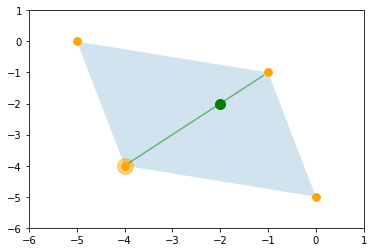

In [38]:
plt.fill_between(
    [-5, -4, -1, 0],
    [0, -4, -5+1/4, -5],
    [0, -1/4, -1, -5],
    alpha=0.2)
plt.scatter([-2], [-2], color='green', s=100, marker='o')
plt.plot([-3.9, -1.1], [-3.9, -1.1], color='green', alpha=0.5)
plt.scatter([-5, -4, -1, 0], [0, -4, -1, -5], color='orange', s=60)
plt.scatter([-4], [-4], color='orange', s=250, alpha=0.5)
plt.ylim(-6, 1)
plt.xlim(-6, 1)
plt.savefig('img/convex_hull.svg', format='svg')
plt.show()